# EDA - Estado de Florida

En este archivo se realiza el ETL y el EDA de los archivos en el directorio data/raw/google-maps/reviews-estados/review-Florida. Previamente tendrá que filtrarse con los datos del dataset de metadata-sitios procesado.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys
from datetime import datetime, timedelta

# Ignorar advertencias
warnings.filterwarnings('ignore')

In [2]:
# Navegar hacia el directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))

# Agregar la ruta del proyecto al sys.path para traer librerías personalizadas
sys.path.append(project_root)

In [3]:
# importar funciones personalizadas en src/utils
from src.utils.EDA import merge_files, get_frequency

## Extracción de Datos

In [4]:
# se guarda el directorio con los datasets en una variable
data_dir = os.path.join(project_root, 'data/raw/google_maps/reviews-estados/review-Florida')

# se utiliza la función merge_files para unir los archivos en un solo DataFrame
florida = merge_files(data_dir)

# Se verifica la estructura del DataFrame
florida.head(3)

Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\1.parquet
Archivo 1.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\10.parquet
Archivo 10.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\11.parquet
Archivo 11.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\12.parquet
Archivo 12.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataScience\LABS\Proyecto Grupal\Google-Yelp\data/raw/google_maps/reviews-estados/review-Florida\13.parquet
Archivo 13.parquet leído exitosamente con 150000 registros.
Leyendo archivo: d:\Henry-DataSc

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.014719e+20,Julie A. Gerber,1628003250740,1,Update: Their “reply” to my review amounted to...,None,{'text': 'Thank you for the feedback. We would...,0x8893863ea87bd5dd:0x9383ebf973e74abb
1,1.154772e+20,Martin Sheffield,1595031217005,5,He's a knowledgeable doctor but the way he run...,None,{'text': 'Thank you for reaching out. I’m forw...,0x8893863ea87bd5dd:0x9383ebf973e74abb
2,1.018050e+20,Brian Truett,1522924253567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb


## Filtrar Reviews de Servicios Gastronómicos

In [5]:
# se guarda el directorio con el datasets de metadata procesado en una variable
data_dir = os.path.join(project_root, 'data/processed/google_maps/metadata_final.parquet')

# leer parquet y visualizar los primeros elementos
metadata = pd.read_parquet(data_dir)
metadata.head(3)

,name,address,gmap_id,latitude,longitude,avg_rating,num_of_reviews,category
0,"""Best Mexican Food in Town""","""Best Mexican Food in Town"", 1130 S State St, ...",0x80816451cb67d913:0xa4553d4f3b03ec7,39.135483,-123.205517,4.3,3,[mexican restaurant]
1,"""Domenica alle Due"" - Robert Anthony's Italian...","""Domenica alle Due"" - Robert Anthony's Italian...",0x89e843ba6e1a9b9d:0x13f13f31d51ae5ce,40.951891,-72.984564,5.0,8,[italian restaurant]
2,"""Elotes Y Nachos"" El Toro","""Elotes Y Nachos"" El Toro, Arlington, TX 76010",0x864e87edad1b6373:0x288178eb4d631ed6,32.718081,-97.079521,4.4,8,[mexican restaurant]


In [40]:
# Filtrar los datos de florida donde gmap_id también esté en metadata y mostrar la nueva longitud
reviews = florida.merge(metadata, on='gmap_id', how='inner').reset_index()
len(reviews)

966915

## Eliminar Columnas Innecesarias

La columna pics no aporta material para el proyecto.

In [41]:
# eliminar columna pics
reviews.drop(columns=['pics'], inplace=True, axis=1)

## Visualización de Datos

### Vista Rápida
Se realiza un breve vistazo de los datos.

In [42]:
# se verifica la estructura del dataframe filtrado
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966915 entries, 0 to 966914
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           966915 non-null  int64  
 1   user_id         966915 non-null  float64
 2   name_x          966915 non-null  object 
 3   time            966915 non-null  int64  
 4   rating          966915 non-null  int64  
 5   text            589536 non-null  object 
 6   resp            128269 non-null  object 
 7   gmap_id         966915 non-null  object 
 8   name_y          966915 non-null  object 
 9   address         966915 non-null  object 
 10  latitude        966915 non-null  float64
 11  longitude       966915 non-null  float64
 12  avg_rating      966915 non-null  float64
 13  num_of_reviews  966915 non-null  int64  
 14  category        966915 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 110.7+ MB


In [43]:
# comprensión de variables numéricas
reviews.describe()

,index,user_id,time,rating,latitude,longitude,avg_rating,num_of_reviews
count,966915.000000,9.669150e+05,9.669150e+05,966915.000000,966915.000000,966915.000000,966915.000000,966915.000000
mean,483457.000000,1.092325e+20,1.555531e+12,4.231885,27.942183,-81.749149,4.181574,1693.208494
std,279124.462104,5.321390e+18,4.053243e+10,1.153122,1.432970,1.460633,0.396660,1405.270670
min,0.000000,1.000000e+20,1.041379e+12,1.000000,24.550387,-87.333840,1.500000,8.000000
25%,241728.500000,1.046346e+20,1.529675e+12,4.000000,26.650757,-82.454733,4.000000,778.000000
50%,483457.000000,1.092259e+20,1.556461e+12,5.000000,28.011572,-81.550936,4.300000,1342.000000
75%,725185.500000,1.138418e+20,1.581856e+12,5.000000,28.597119,-80.633196,4.500000,2158.000000
max,966914.000000,1.184467e+20,1.631069e+12,5.000000,30.944799,-80.050159,5.000000,8116.000000


In [44]:
# visualizar primeras filas
reviews.head(3)

,index,user_id,name_x,time,rating,text,resp,gmap_id,name_y,address,latitude,longitude,avg_rating,num_of_reviews,category
0,0,1.089733e+20,Johnny McMuffin,1534506921535,4,Nice little outdoor Tiki Bar at the Holiday In...,None,0x88d769c187b52953:0xe3ace06a033182f6,Bogie's Cafe,"Bogie's Cafe, 99701 Overseas Hwy, Key Largo, F...",25.095637,-80.438401,4.1,8,"[american restaurant, american restaurant]"
1,1,1.183531e+20,Jesse Peterson,1564493738143,4,"Nice buffet, kitchen staff provided good food....",None,0x88d769c187b52953:0xe3ace06a033182f6,Bogie's Cafe,"Bogie's Cafe, 99701 Overseas Hwy, Key Largo, F...",25.095637,-80.438401,4.1,8,"[american restaurant, american restaurant]"
2,2,1.060498e+20,Art Stadlin,1353454773013,5,We ate a light lunch before our cruise. Nice ...,None,0x88d769c187b52953:0xe3ace06a033182f6,Bogie's Cafe,"Bogie's Cafe, 99701 Overseas Hwy, Key Largo, F...",25.095637,-80.438401,4.1,8,"[american restaurant, american restaurant]"


In [49]:
# visualizar nulos
reviews.isna().sum()

index             0
user_id           0
name_x            0
time              0
rating            0
text              0
resp              0
gmap_id           0
name_y            0
address           0
latitude          0
longitude         0
avg_rating        0
num_of_reviews    0
category          0
dtype: int64

In [48]:
# auditar la columna text, valores nulos = ''
reviews['text'] = reviews['text'].fillna('')

### Visualización de los Datos

#### Distribución General de Calificaciones (rating)
Un gráfico de barras para las categorías ayudará a entender las frecuencias y a encontrar las categorías con mayor cantidad de reseñas.

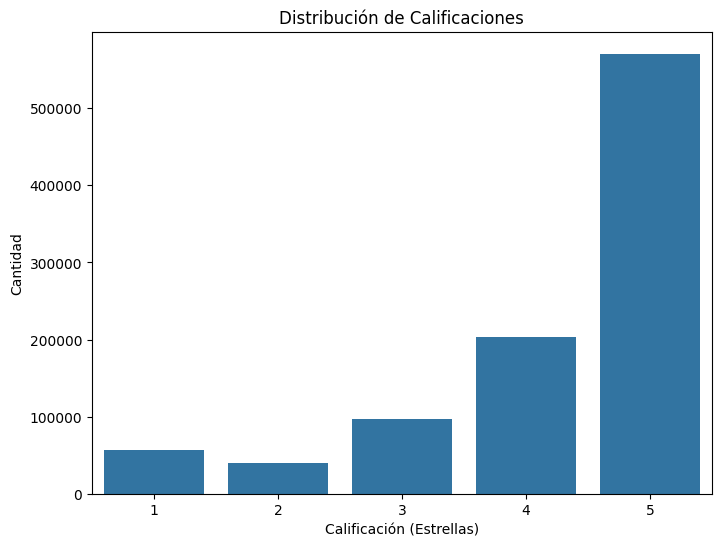

In [45]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=reviews)
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación (Estrellas)')
plt.ylabel('Cantidad')
plt.show()

Puede notarse que la mayoría de los usuarios tienden a calificar con 5 estrellas y que la minoría califica con 2.

#### Respuesta a Reseñas (resp)
Usa un gráfico de barras para la columna resp (donde 1 significa que hubo respuesta y 0 que no la hubo) para visualizar qué tan frecuentemente los locales responden a las reseñas.

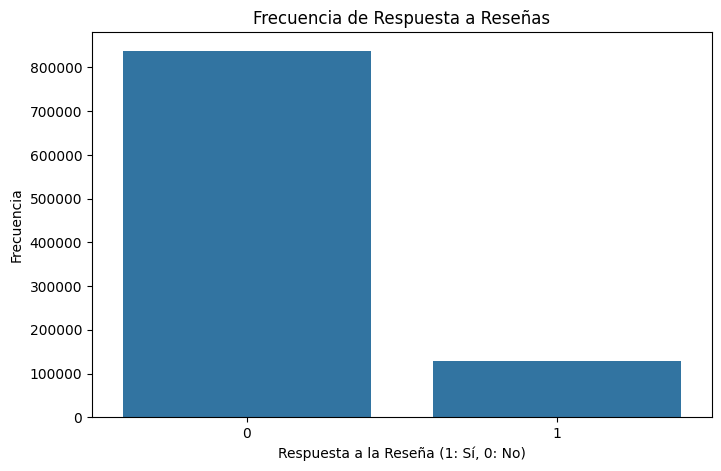

In [46]:
# Convertir valores de `resp` a binarios
reviews['resp'] = reviews['resp'].notna().astype(int)

plt.figure(figsize=(8, 5))
sns.countplot(x='resp', data=reviews)
plt.title('Frecuencia de Respuesta a Reseñas')
plt.xlabel('Respuesta a la Reseña (1: Sí, 0: No)')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los locales no responden a las reseñas.

### Relación entre Reseñas, Respuestas y Calificación
Un violinplot puede ayudar a ver la relación entre rating y si la reseña recibió respuesta (resp), buscando si hay diferencia en la calificación de los usuarios cuando reciben una respuesta.

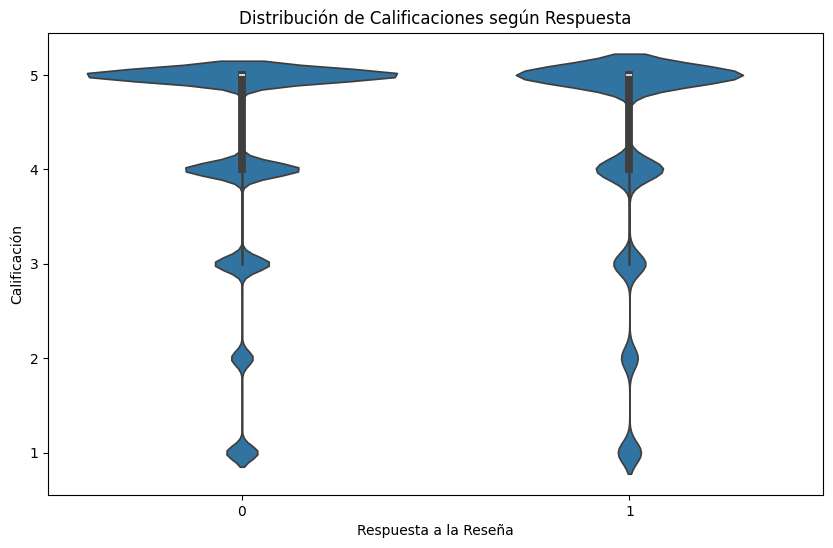

In [52]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='resp', y='rating', data=reviews)
plt.title('Distribución de Calificaciones según Respuesta')
plt.xlabel('Respuesta a la Reseña')
plt.ylabel('Calificación')
plt.show()

Las gráficas se ven muy similares, por lo que no hay relación directa entre las respuestas y las calificaciones.

### Análisis Temporal
- Usar time para observar el tiempo que pasa antes de que un usuario haga una reseña.
- Transformar time a una fecha y analizar la frecuencia de reseñas a lo largo del tiempo.

In [58]:
# supongamos que time son la cantidad de segundos que pasaron desde la fecha de publicación de la review hasta ahora
fecha_referencia = datetime.now()

# convertir el tiempo en segundos a datetime restando el tiempo desde la fecha de referencia
reviews['time'] = pd.to_timedelta(reviews['time'], unit='ms')
reviews['time'] = fecha_referencia - reviews['time']

# visualizar primeros elementos
reviews.head(3)

,index,user_id,name_x,time,rating,text,resp,gmap_id,name_y,address,latitude,longitude,avg_rating,num_of_reviews,category
0,0,1.089733e+20,Johnny McMuffin,2018-08-17 11:56:10.352905,4,Nice little outdoor Tiki Bar at the Holiday In...,0,0x88d769c187b52953:0xe3ace06a033182f6,Bogie's Cafe,"Bogie's Cafe, 99701 Overseas Hwy, Key Largo, F...",25.095637,-80.438401,4.1,8,"[american restaurant, american restaurant]"
1,1,1.183531e+20,Jesse Peterson,2019-07-30 13:36:26.960905,4,"Nice buffet, kitchen staff provided good food....",0,0x88d769c187b52953:0xe3ace06a033182f6,Bogie's Cafe,"Bogie's Cafe, 99701 Overseas Hwy, Key Largo, F...",25.095637,-80.438401,4.1,8,"[american restaurant, american restaurant]"
2,2,1.060498e+20,Art Stadlin,2012-11-20 23:40:21.830905,5,We ate a light lunch before our cruise. Nice ...,0,0x88d769c187b52953:0xe3ace06a033182f6,Bogie's Cafe,"Bogie's Cafe, 99701 Overseas Hwy, Key Largo, F...",25.095637,-80.438401,4.1,8,"[american restaurant, american restaurant]"


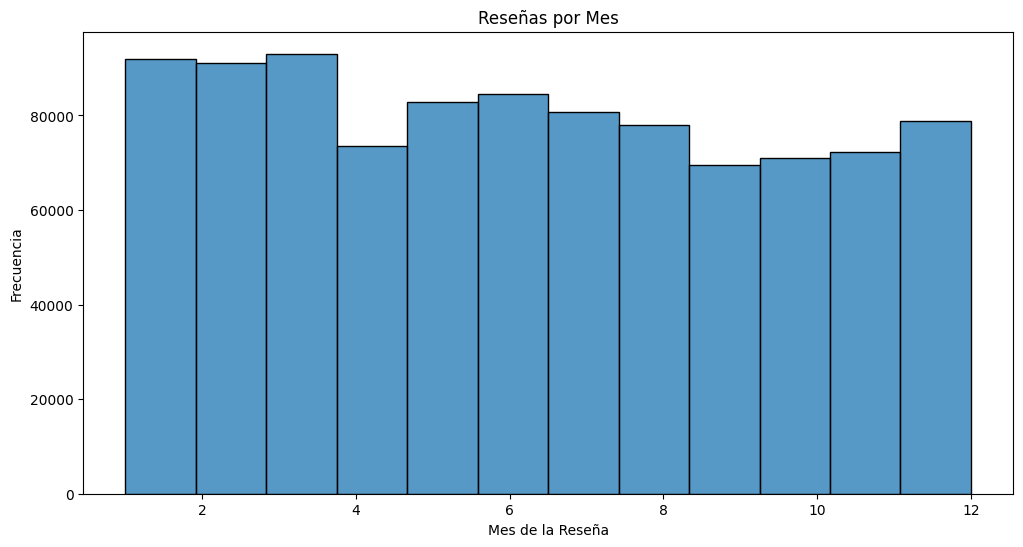

In [86]:
# visualizar reseñas por meses
plt.figure(figsize=(12, 6))
sns.histplot(data=reviews, x=reviews['time'].dt.month, bins=12)

# Personalizar el gráfico
plt.title('Reseñas por Mes')
plt.xlabel('Mes de la Reseña')
plt.ylabel('Frecuencia')
plt.show()

Se nota un aumento de reseñas en enero, febrero y marzo y la menor cantidad enseptiembre, octubre y noviembre.

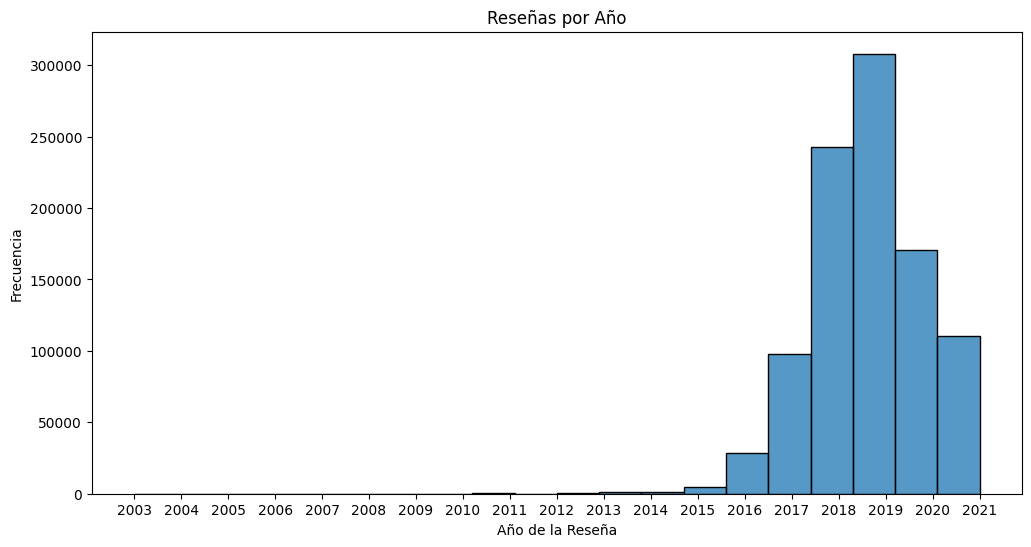

In [ ]:
# Visualizar reseñas por año
plt.figure(figsize=(12, 6))
sns.histplot(data=reviews, x=reviews['time'].dt.year, bins=20)

# Personalizar el gráfico
plt.title('Reseñas por Año')
plt.xlabel('Año de la Reseña')
plt.ylabel('Frecuencia')

# Asegurar que los años aparezcan como enteros
plt.xticks(ticks=range(reviews['time'].dt.year.min(), reviews['time'].dt.year.max() + 1))

plt.show()

La mayoría de las reseñas fueron en el año 2019 y 2018 disminuyendo enormemente los dos años siguientes.

### Negocios Gastronómicos con más Reviews

In [79]:
negocios = get_frequency(reviews, 'name_y')
negocios.head(20)

,name_y,frequency,percentage
0,McDonald's,75439,7.80
1,Wendy's,21441,2.22
2,Chick-fil-A,17345,1.79
3,Cracker Barrel Old Country Store,14234,1.47
4,IHOP,14175,1.47
5,Steak 'n Shake,12110,1.25
6,Denny's,11900,1.23
7,Taco Bell,11464,1.19
8,Starbucks,11006,1.14
9,LongHorn Steakhouse,10418,1.08


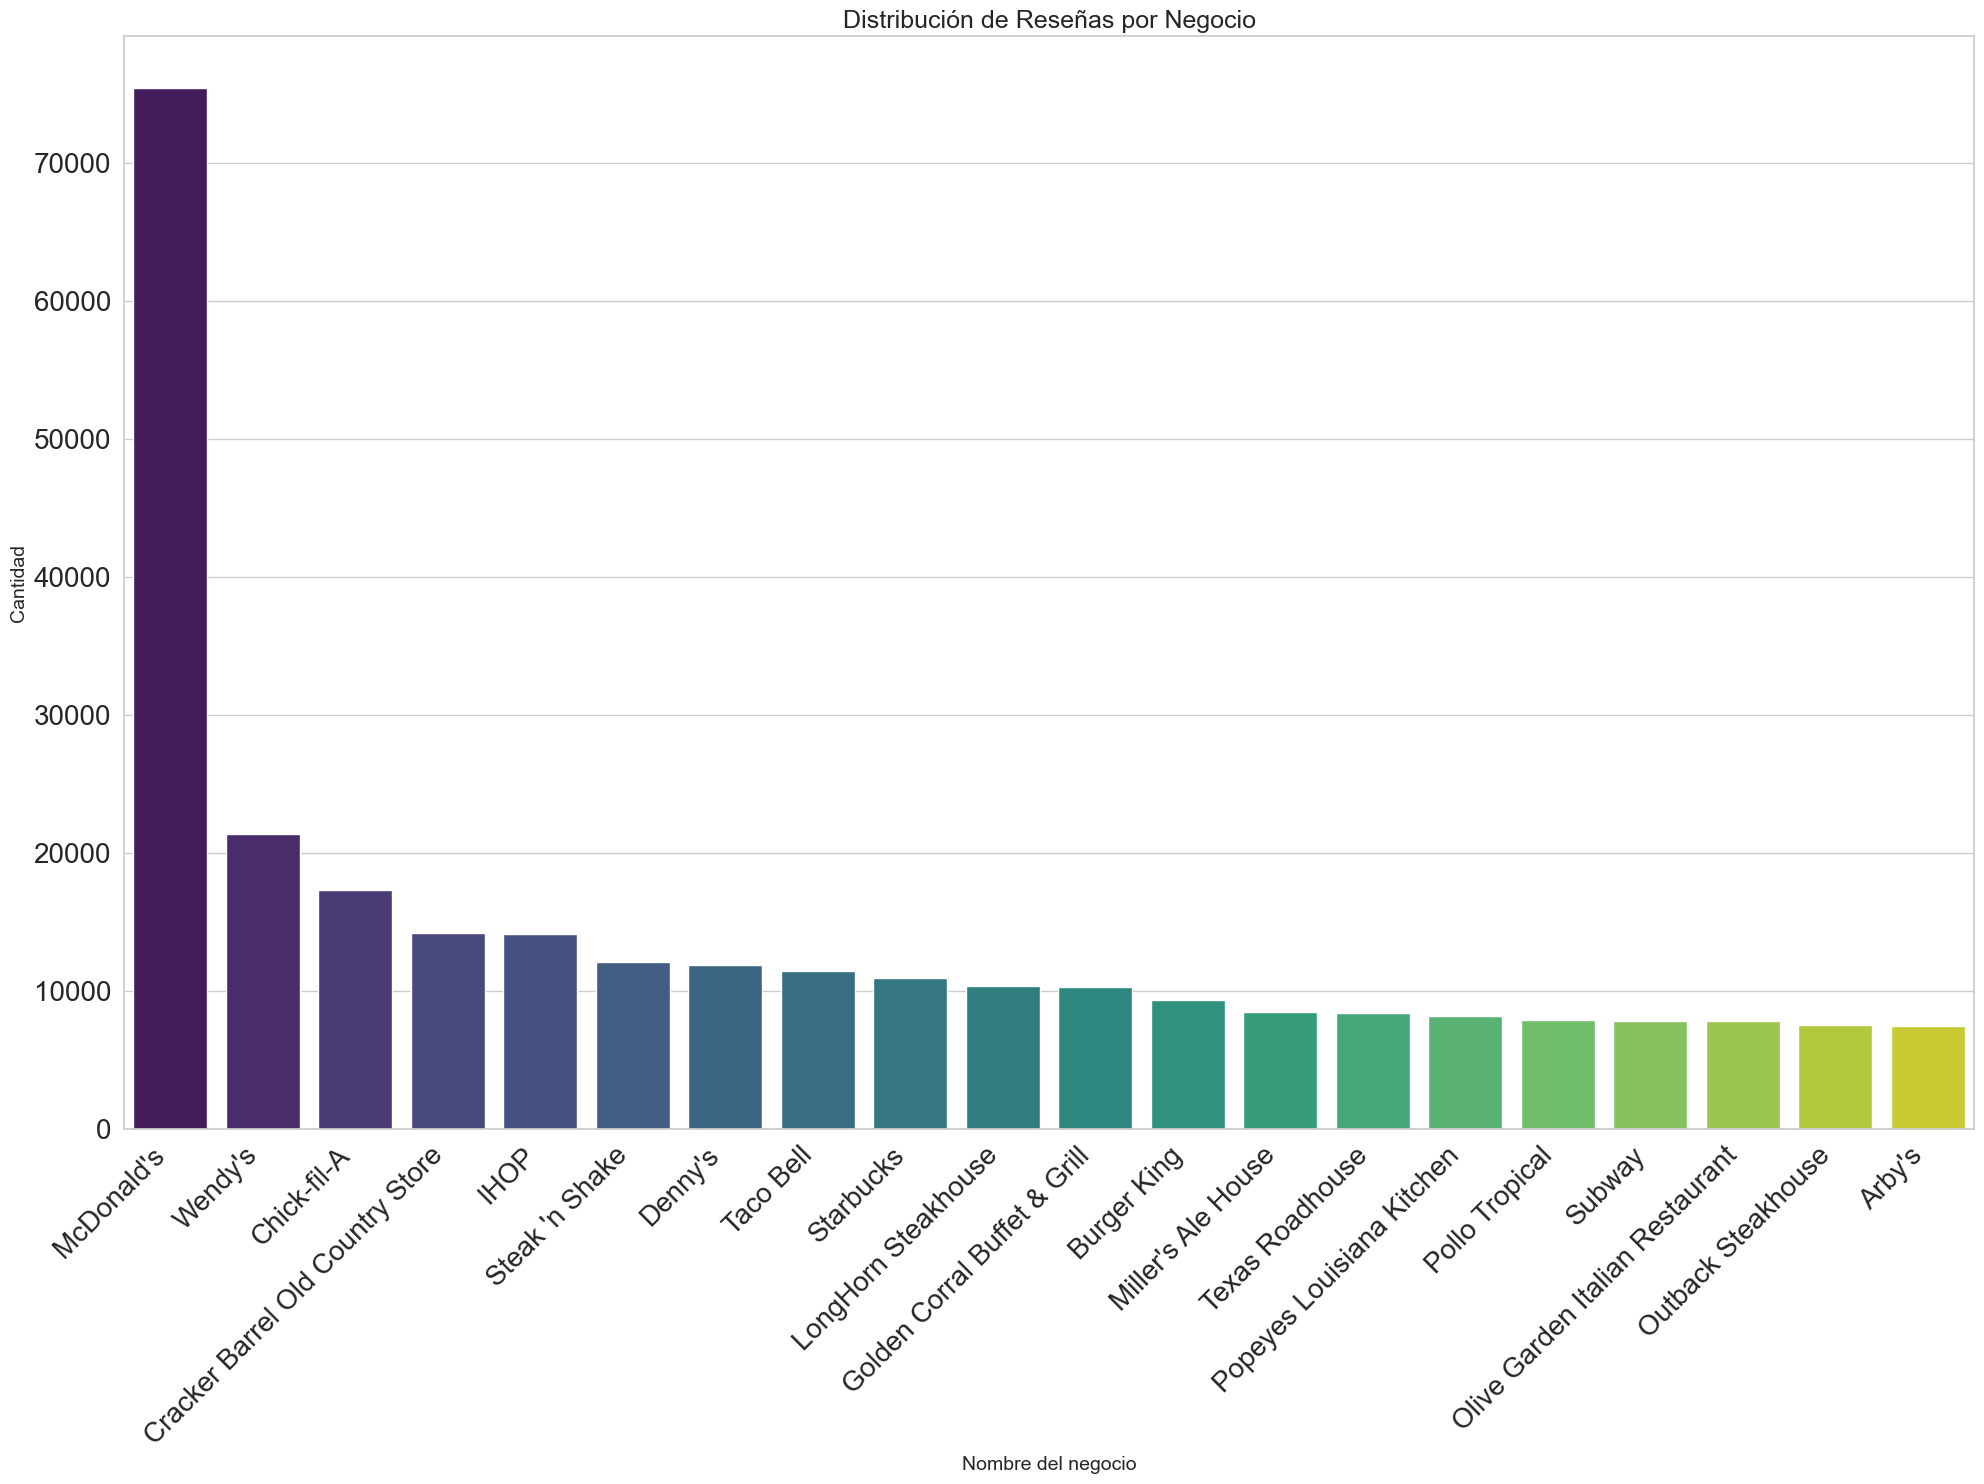

In [90]:
# Gráfico de Barras para ver las categorías más frecuentes
# Configuración del gráfico
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

# Gráfico de barras con rotación de etiquetas
barplot = sns.barplot(x='name_y', y='frequency', data=negocios.head(20), palette="viridis")
barplot.set_title('Distribución de Reseñas por Negocio', fontsize=18)
barplot.set_xlabel('Nombre del negocio', fontsize=14)
barplot.set_ylabel('Cantidad', fontsize=14)

# Rotar etiquetas de las categorías en el eje X
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha="right", fontsize=20)
barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=20)

# Mostrar el gráfico
plt.tight_layout()  # Asegura que los elementos no se sobrepongan
plt.show()

Mientras todos los demás negocios en el top 20 van disminuyendo lentamente la cantidad de reseñas, McDonald's los sobrepasa por mucho.

## Exportar Reviews Unificadas

In [91]:
# Exportar reviews
reviews.to_parquet('../../data/processed/google_maps/reviews.parquet', index=False, compression='gzip')